In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import style
%matplotlib inline
from sklearn import metrics


In [2]:
##Import the three datasets
movies_dataset = pd.read_csv("movies.dat", sep='::',names=['MovieID','Title','Genres'],engine='python')
users_dataset = pd.read_csv("users.dat", sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
ratings_dataset = pd.read_csv("ratings.dat", sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python')

In [3]:
movies_dataset.head(15)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
users_dataset.head(15)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [5]:
ratings_dataset.head(15)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [6]:
#Creating a new dataset [Master_Data] with the columns: MovieID Title UserID Age Gender Occupation Rating.

#Merge users data + ratings data based on userID
Merged_ur = pd.merge(users_dataset, ratings_dataset, on='UserID')
#Merge movies data + ratings data based on movieID
Merged_mr = pd.merge(movies_dataset, ratings_dataset, on='MovieID')
#Now merge the two merged data
master_data = pd.merge(Merged_ur, Merged_mr, on=['MovieID','UserID'])
#Finally show the output
master_data.head(15)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating_x,Timestamp_x,Title,Genres,Rating_y,Timestamp_y
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,5,978300760
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,3,978302109
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance,3,978301968
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama,4,978300275
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,5,978824291
5,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,3,978302268
6,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,5,978302039
7,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,5,978300719
8,1,F,1,10,48067,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,4,978302268
9,1,F,1,10,48067,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,4,978301368


In [7]:
#Drop unwanted columns
master_data= master_data.drop(['Timestamp_x','Genres','Timestamp_y','Zip-code','Rating_x'],1)
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Rating_y
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),5
1,1,F,1,10,661,James and the Giant Peach (1996),3
2,1,F,1,10,914,My Fair Lady (1964),3
3,1,F,1,10,3408,Erin Brockovich (2000),4
4,1,F,1,10,2355,"Bug's Life, A (1998)",5


In [8]:
ratings_dataset.shape

(1000209, 4)

In [9]:
#change the name of the column
master_data = master_data.rename(columns={"Rating_y":"Rating"})
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Rating
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),5
1,1,F,1,10,661,James and the Giant Peach (1996),3
2,1,F,1,10,914,My Fair Lady (1964),3
3,1,F,1,10,3408,Erin Brockovich (2000),4
4,1,F,1,10,2355,"Bug's Life, A (1998)",5


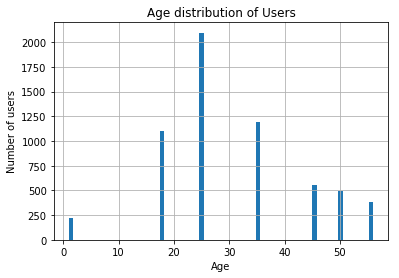

In [10]:
#User Age Distribution in histogram:
plt.figure(figsize=(6,4))
users_dataset['Age'].hist(bins=70)
plt.title('Age distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

In [11]:
#User rating of the movie “Toy Story”
#First: group master data by the title
master_groupby_Title = master_data.groupby('Title')
#then, get group by the title of the movie 
toy_story = master_groupby_Title.get_group('Toy Story (1995)')
toy_story.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Rating
40,1,F,1,10,1,Toy Story (1995),5
469,6,F,50,9,1,Toy Story (1995),4
581,8,M,25,12,1,Toy Story (1995),4
711,9,M,25,17,1,Toy Story (1995),5
837,10,F,35,1,1,Toy Story (1995),5


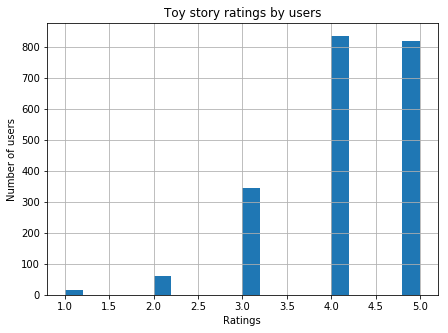

In [12]:
#Visual representation of the User rating of the movie “Toy Story” in histogram
plt.figure(figsize=(7,5))
toy_story['Rating'].hist(bins=20)
plt.title('Toy story ratings by users')
plt.xlabel('Ratings')
plt.ylabel('Number of users')
plt.show()

In [13]:
print ("the mean rating of Toy Story=") 
toy_story.Rating.mean()

the mean rating of Toy Story=


4.146846413095811

In [14]:
#Top 25 movies by viewership rating
#getting the mean for each movie:
avg_ratings=  master_groupby_Title.agg({'Rating':'mean'})
#to know the number of ratings for each movie:
avg_ratings['num_of_ratings'] = master_data.groupby('Title')['Rating'].count()
#using describe().. I get to know the mean and min and max etc. 
#to know the nature of the dataset.
avg_ratings.num_of_ratings.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: num_of_ratings, dtype: float64

In [15]:
#Sorting the values by the rating(ascending=False) will put the closest movies to 5 in the top of avg_ratings
avg_ratings= avg_ratings.sort_values('Rating', ascending=False) 
#I need to exclude some movies that has not been rated by enough number of users
#I consider 15 or more users is enough to assess each movie based on describe() of the number of ratings
avg_ratings= avg_ratings[avg_ratings.num_of_ratings >= 15 ]
top25= avg_ratings.head(25)
#Display the top 25 movies
top25

,Rating,num_of_ratings
Title,,
Sanjuro (1962),4.608696,69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510,628
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Close Shave, A (1995)",4.520548,657
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
"Wrong Trousers, The (1993)",4.507937,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470


In [16]:
#Finding the ratings for all the movies reviewed by for a particular user of user id = 2696
master_groupby_users = master_data.groupby('UserID')
user2696 = master_groupby_users.get_group(2696)
user2696[['UserID','Gender','Age','Occupation','MovieID','Title','Rating']]

,UserID,Gender,Age,Occupation,MovieID,Title,Rating
440667,2696,M,25,7,1258,"Shining, The (1980)",4
440668,2696,M,25,7,1270,Back to the Future (1985),2
440669,2696,M,25,7,1617,L.A. Confidential (1997),4
440670,2696,M,25,7,1625,"Game, The (1997)",4
440671,2696,M,25,7,1644,I Know What You Did Last Summer (1997),2
440672,2696,M,25,7,1645,"Devil's Advocate, The (1997)",4
440673,2696,M,25,7,1805,Wild Things (1998),4
440674,2696,M,25,7,1892,"Perfect Murder, A (1998)",4
440675,2696,M,25,7,800,Lone Star (1996),5
440676,2696,M,25,7,2338,I Still Know What You Did Last Summer (1998),2


In [17]:
#Finding out all the unique genres
#Splitting Genres by |
AllGenres = movies_dataset['Genres'].str.split("|",n=5, expand=True)

#converting AllGenres to a list
AllGenres.values.tolist()

#Creatingan array called Unique_genres
Unique_genres = np.array(AllGenres)

#flatten the array
Unique_genres.flatten()

#Excluding none values
Unique_genres=Unique_genres[Unique_genres!=None]

#Selecting Unique genres
Unique_genres=np.unique(Unique_genres, return_index=False)

print (Unique_genres)

['Action' 'Adventure' 'Animation' "Children's" 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [18]:
print ("number of unique genres:")
print (Unique_genres.size)

number of unique genres:
18


In [19]:
#Creating a separate column for each genre category with a one-hot encoding ( 1 and 0).
#using | as a splitter 
dummies1 = pd.get_dummies(movies_dataset['Genres'].str.split('|').apply(pd.Series).stack()).sum(level=0)
dummies1.shape

(3883, 18)

In [20]:
#use concat to merge (movies_dataset, dummies1) 
encoding01= pd .concat([movies_dataset,dummies1],axis='columns')
encoding01.head()


,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#dropping unwanted columns
encoding01= encoding01.drop(['Title','Genres'],1)
encoding01.head()

,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# creating dummies for gender
gender_dummies = master_data['Gender'].str.get_dummies()
gender_dummies.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [23]:
#Creating a sample by using concat to merge (master_data,gender_dummies)
#This sample will be used for the prediction model
sample_1 =  pd.concat([master_data,gender_dummies],axis='columns')
sample_1.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Rating,F,M
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),5,1,0
1,1,F,1,10,661,James and the Giant Peach (1996),3,1,0
2,1,F,1,10,914,My Fair Lady (1964),3,1,0
3,1,F,1,10,3408,Erin Brockovich (2000),4,1,0
4,1,F,1,10,2355,"Bug's Life, A (1998)",5,1,0


In [24]:
#using concat to merge (sample_1, encoding01)
sample_1 = pd.merge(sample_1, encoding01, on='MovieID')
sample_1.head(15)

,UserID,Gender,Age,Occupation,MovieID,Title,Rating,F,M,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,18,F,18,3,1193,One Flew Over the Cuckoo's Nest (1975),4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,19,M,1,10,1193,One Flew Over the Cuckoo's Nest (1975),5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,24,F,25,7,1193,One Flew Over the Cuckoo's Nest (1975),5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,28,F,25,1,1193,One Flew Over the Cuckoo's Nest (1975),3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,33,M,45,3,1193,One Flew Over the Cuckoo's Nest (1975),5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#dropping unwanted columns
sample_1 = sample_1.drop(['Title','Gender','UserID','MovieID'],1)
sample_1.tail(12)

,Age,Occupation,Rating,F,M,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1000197,56,13,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000198,56,13,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000199,56,13,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000200,1,19,3,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1000201,35,17,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1000202,35,17,4,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000203,45,6,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000204,18,17,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,35,14,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,18,17,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#the shape of the sample
sample_1.shape

(1000209, 23)

In [27]:
#Creating a sample for classification
X_sample = sample_1.sample(n=5000, random_state=0)

#All of these features will be used for classification:
X_df = X_sample[['Age','Occupation','F','M','Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']]

#The target of the classification:
y_df = X_sample['Rating']
X_df.head()

,Age,Occupation,F,M,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
324271,35,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
818637,25,17,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148677,45,12,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
778790,25,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
525489,50,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#This is categorical supervised learning becaude the output is either 1 or 2 or 3 or 4 or 5.
#Since this is a categorical supervised learning, I will use Random Forest for classification
rf = RandomForestClassifier(n_estimators= 100)

#assigning varibles and choosing the test size.
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size = 0.20,random_state =1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print (metrics.confusion_matrix(y_test,y_pred))
print ("Accuracy of the model:", metrics.accuracy_score(y_test,y_pred))

[[  4   6  18  15   4]
 [  6   6  29  45  21]
 [ 12  18  80 115  48]
 [ 14  23  94 150  77]
 [  3  17  43  97  55]]
Accuracy of the model: 0.295


In [29]:
print("Actual Values:    ",y_test.values[0:30])
print("Predicted Values: ",y_pred[0:30])

Actual Values:     [4 2 4 3 4 2 4 5 4 3 4 4 4 5 5 3 4 4 3 5 3 3 4 2 4 3 3 4 2 2]
Predicted Values:  [1 4 4 4 4 3 5 5 4 3 3 5 4 4 4 3 4 4 3 5 4 3 3 5 5 3 4 4 4 5]


In [30]:
print("The report of the classification: ")
print(metrics.classification_report(y_test, y_pred))
#these are poor results.. so I decided to change features hoping for better results.

The report of the classification: 
              precision    recall  f1-score   support

           1       0.10      0.09      0.09        47
           2       0.09      0.06      0.07       107
           3       0.30      0.29      0.30       273
           4       0.36      0.42      0.38       358
           5       0.27      0.26      0.26       215

   micro avg       0.29      0.29      0.29      1000
   macro avg       0.22      0.22      0.22      1000
weighted avg       0.28      0.29      0.29      1000



In [31]:
#Excluding the Genres from the sample
X_df = X_sample[['Age','Occupation','F','M']]
y_df = X_sample['Rating']
X_df.head()

,Age,Occupation,F,M
324271,35,0,0,1
818637,25,17,0,1
148677,45,12,0,1
778790,25,0,1,0
525489,50,0,0,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size = 0.20,random_state =1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (metrics.confusion_matrix(y_test,y_pred))
print ("Accuracy of the model:", metrics.accuracy_score(y_test,y_pred))

[[  0   1   9  35   2]
 [  0   2  22  78   5]
 [  2   6  50 201  14]
 [  3   2  67 267  19]
 [  1   2  29 161  22]]
Accuracy of the model: 0.341


In [33]:
print("Actual Values:    ",y_test.values[0:30])
print("Predicted Values: ",y_pred[0:30])

Actual Values:     [4 2 4 3 4 2 4 5 4 3 4 4 4 5 5 3 4 4 3 5 3 3 4 2 4 3 3 4 2 2]
Predicted Values:  [4 4 4 4 4 4 5 1 4 3 4 4 3 4 4 4 4 4 3 4 4 4 3 3 4 4 4 3 4 3]


In [34]:
print("The report of the classification: ")
print(metrics.classification_report(y_test, y_pred))
#It seems that the results are better than before but not so much.

The report of the classification: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        47
           2       0.15      0.02      0.03       107
           3       0.28      0.18      0.22       273
           4       0.36      0.75      0.49       358
           5       0.35      0.10      0.16       215

   micro avg       0.34      0.34      0.34      1000
   macro avg       0.23      0.21      0.18      1000
weighted avg       0.30      0.34      0.27      1000



In [35]:
#Excluding the Gender from the sample
X_df = X_sample[['Age','Occupation']]
y_df = X_sample['Rating']
X_df.head()

,Age,Occupation
324271,35,0
818637,25,17
148677,45,12
778790,25,0
525489,50,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df,test_size = 0.20,random_state =1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (metrics.confusion_matrix(y_test,y_pred))
print ("Accuracy of the model:", metrics.accuracy_score(y_test,y_pred))

[[  0   1   8  35   3]
 [  0   2   9  89   7]
 [  0   5  40 215  13]
 [  1   2  45 295  15]
 [  0   5  22 169  19]]
Accuracy of the model: 0.356


In [45]:
print("Actual Values:    ",y_test.values[0:30])
print("Predicted Values: ",y_pred[0:30])

Actual Values:     [4 2 4 3 4 2 4 5 4 3 4 4 4 5 5 3 4 4 3 5 3 3 4 2 4 3 3 4 2 2]
Predicted Values:  [4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 5 3 4 4 4 4 4 4 4 4 3 4 3]


In [46]:
print("The report of the classification: ")
print(metrics.classification_report(y_test, y_pred))
#A slight boost but not that much.

The report of the classification: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        47
           2       0.13      0.02      0.03       107
           3       0.32      0.15      0.20       273
           4       0.37      0.82      0.51       358
           5       0.33      0.09      0.14       215

   micro avg       0.36      0.36      0.36      1000
   macro avg       0.23      0.22      0.18      1000
weighted avg       0.31      0.36      0.27      1000



In [39]:
#It looks like the Features Age and Occupation are the features affecting the ratings of any particular movie.